<a href="https://colab.research.google.com/github/khairooo/Intro-to-AI-projects-/blob/main/Decision_Tree%2C%20Random%20Forest%20chechpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# load packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [17]:
df = pd.read_csv("/content/titanic-passengers.csv", sep = ";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [18]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df.fillna(0, inplace = True)


In [21]:
#df.isnull().sum()


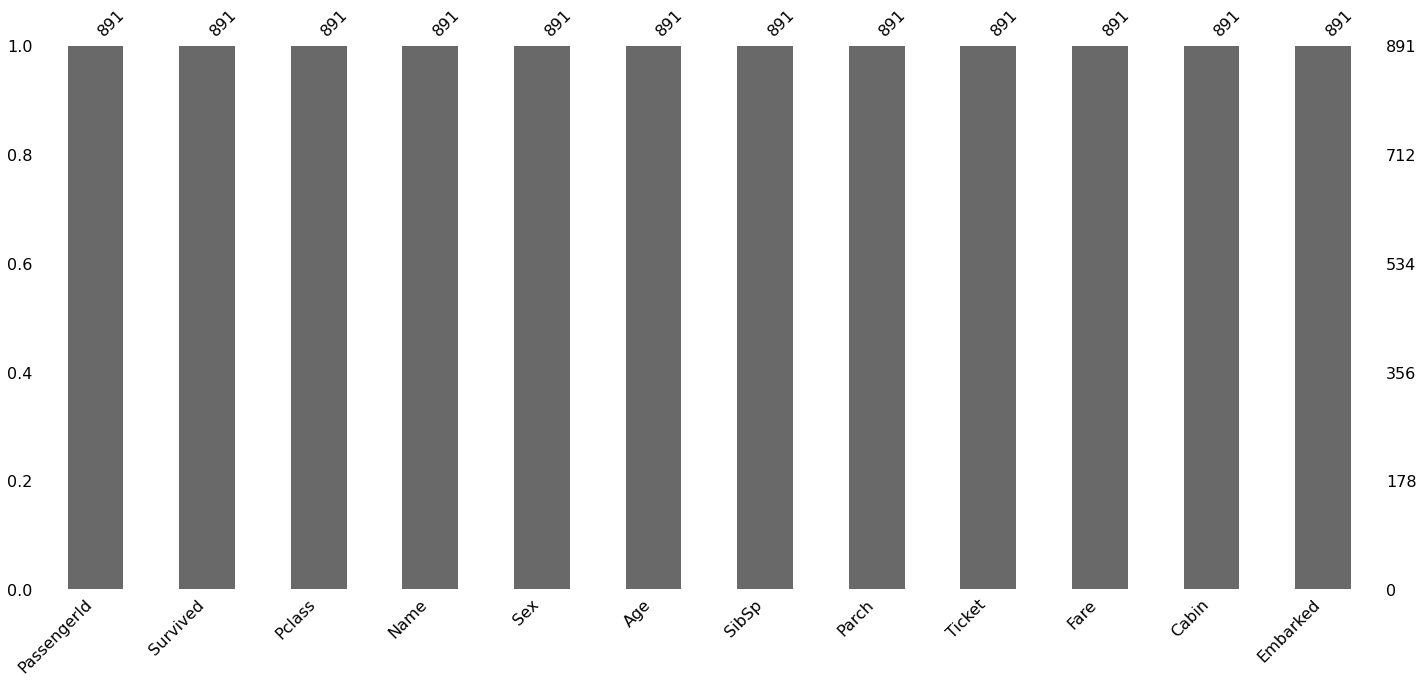

In [22]:
# Instead of using df.isnull.sum(), this time I prefer to use the library missingno to visualize the missing values 
import missingno as msno


# Visualize the number of missing
# values as a bar chart
msno.bar(df)

The bar graph above visualize and indicate that the mumber of missing values is zero, which means that all the missing values have been replacing wen I used fillna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [24]:
df.drop(["Name","Cabin","Embarked","PassengerId","Ticket"],axis = 1,inplace =True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,No,2,male,28.0,0,0,13.0000
1,No,3,male,25.0,0,0,7.6500
2,No,3,male,20.0,0,0,7.8542
3,No,3,female,29.0,0,4,21.0750
4,No,1,male,31.0,1,0,52.0000


In [31]:
from sklearn.preprocessing import LabelEncoder

# encode variables into numeric labels
le = LabelEncoder()

columns = ['Sex', 'Survived']

for col in columns:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2,1,28.0,0,0,13.0000
1,0,3,1,25.0,0,0,7.6500
2,0,3,1,20.0,0,0,7.8542
3,0,3,0,29.0,0,4,21.0750
4,0,1,1,31.0,1,0,52.0000


In [32]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [33]:
df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [35]:
# importing required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'],axis=1)
y = df['Survived']

train_x,test_x,train_y,test_y = train_test_split(X,y, test_size= 0.2, random_state = None)

model = DecisionTreeClassifier()

# fit the model with the training data
model.fit(train_x,train_y)

# depth of the decision tree
print('Depth of the Decision Tree :', model.get_depth())

# predict the target on the train dataset
predict_train = model.predict(test_x)
print('Target on train data',predict_train) 


Depth of the Decision Tree : 19
Target on train data [0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1
 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0]


In [37]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predict_train))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predict_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predict_train)))

Mean Absolute Error: 0.2681564245810056
Mean Squared Error: 0.2681564245810056
Root Mean Squared Error: 0.5178382224025236


## Decision tree Visualization 

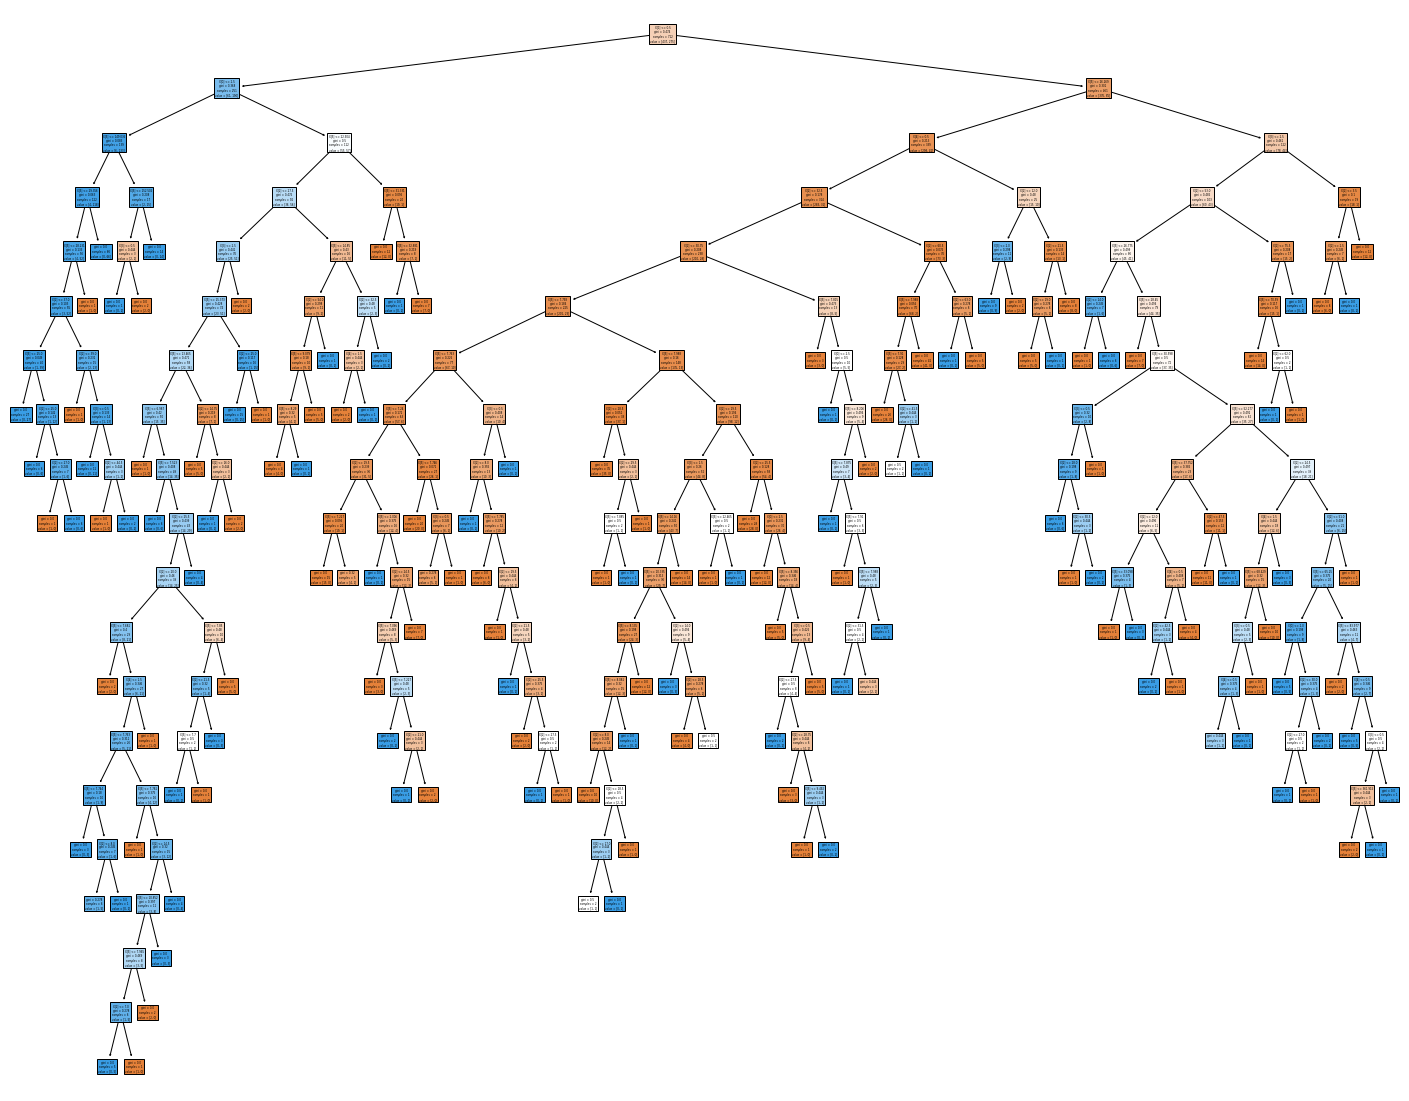

In [42]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model.fit(train_x,train_y),filled=True)

- note :
There are several way to plot a tree, For further information check out the link below:

https://mljar.com/blog/visualize-decision-tree/

## Changing Parametre  

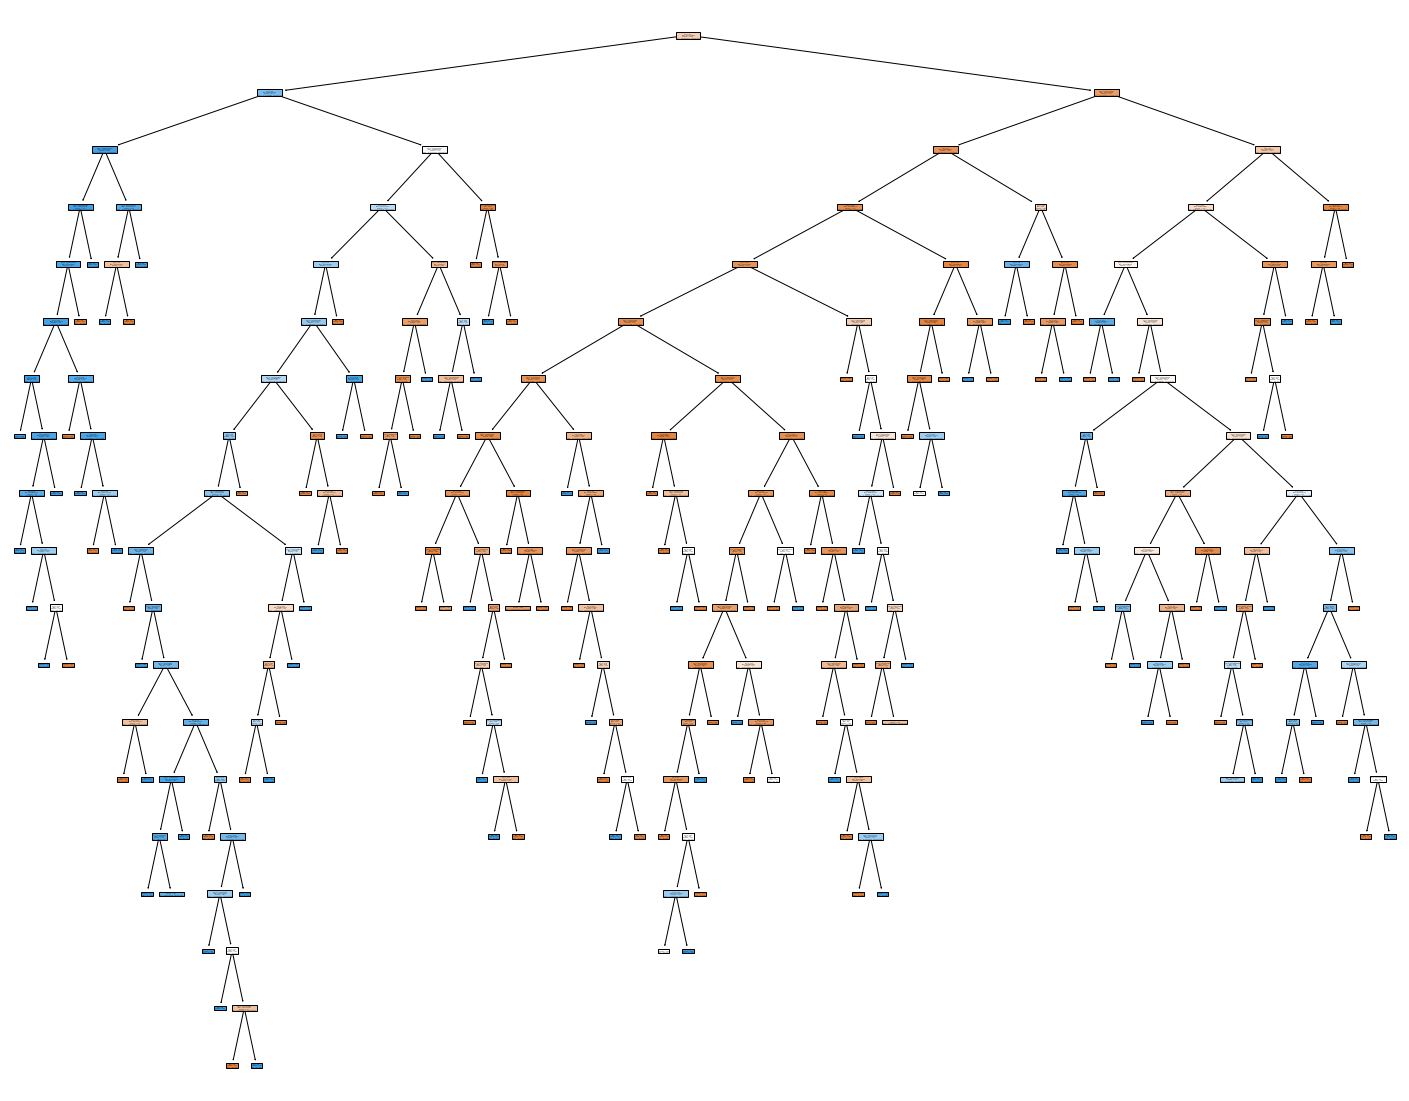

In [46]:
fig2 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model.fit(train_x,train_y),filled=True,proportion=True,precision=10)

### Calculate the new accuracy and compare it with the previous results. 

- In The exercise they only asked about accuracy but to showcase my student a different ways to split the data and evaluations, I used the cross_validation score 

- It can be seen that there is a small optimisation
   
   - Accuracy = 73.18
   - Cross validation score = 77.78

In [50]:
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Decision Tree Classifier is',round(accuracy_score(predict_train,test_y)*100,2))
kfold = KFold(n_splits=10, random_state=22,shuffle = True) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,X,y,cv=10)
# sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
# plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Decision Tree Classifier is 73.18
The cross validated score for Decision Tree is: 77.78


### Use random forest then change the number of estimators

In [60]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='gini', n_estimators=1000,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)


In [61]:
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(predict_train,test_y)*100,2))
kfold = KFold(n_splits=10, random_state=22,shuffle = True) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,X,y,cv=10)
# sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
# plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 73.18
The cross validated score for Random Forest is: 81.49


Each time we use different n_estimators we get the same accuracy :

Example 1 : estimators = 200

  - The accuracy of the Random Forest Classifier is 73.18
  - The cross validated score for Random Forest is: 81.82

Example 2 : n_estimators = 1000

  - The accuracy of the Random Forest Classifier is 73.18
  - The cross validated score for Random Forest is: 81.49